1) DESENVOLVER UM PROCEDIMENTO PARA EFETUAR A PREPARAÇÃO DOS DADOS – GERALMENTE OS VALORES FORA DA FAIXA DE GERALMENTE OS VALORES FORA DA FAIXA DE
ANÁLISE PADRÃO SÃO “REMOVIDOS”/”SUBSTITUÍDOS” POR UM VALOR MÉDIO ENTRE O VALOR ANTECESSOR E POSTERIOR.
DESENVOLVER O SOFTWARE EM PYTHON.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#imports // rodar uma vez
import matplotlib.pyplot as plt
import numpy as np
import random

import pandas as pd
from pandas import read_csv
from pandas import set_option
import time as tm
# FFT
from numpy.fft import fft, ifft


In [ ]:

dados=[]


# *********************
# * LEITURA DOS DADOS *
# *********************
import csv
path = "/content/drive/MyDrive/DadosVitais/sinaisvitais003 100dias DV2 RAxxx8.txt"
with open(path,'r',newline='') as ARQUIVO:
 d = csv.reader(ARQUIVO)
 dd=list(d)
 for i in range(0,len(dd)):
  p=dd[i][0]  
  palavras=p.split("\t")
  dados.append({"HORA":int(palavras[0]),"BATIMENTO":float(palavras[1]),"PRESSAO":float(palavras[2]),"TEMPERATURA":float(palavras[3])})
  

In [ ]:
# **********************************
# * SEPARAR OS CAMPOS PARA ANALISE *
# **********************************
hora=[]
batimento=[]
pressao=[]
temperatura=[]
for i in range(0,len(dados)):
    hora.append(dados[i]["HORA"])
    batimento.append(float(dados[i]["BATIMENTO"]))
    pressao.append(float(dados[i]["PRESSAO"]))
    temperatura.append(float(dados[i]["TEMPERATURA"]))

In [ ]:
# ************************************
# * CALCUALR A MEDIA DE DOIS VALORES *
# ************************************
def media(v1,v2):
  return (v1+v2)/2

#****************************************
# PRE-PROCESSAMENTO
# 0 <= Batimento <= 100
# 0 <= pressao <= 20
# 0 <= temperatura <= 40 
#****************************************
for i in range(1,len(dados)-1):
    if (batimento[i]<0) or (batimento[i]>100):
        batimento[i]=media(batimento[i-1],batimento[i+1])
    if (pressao[i]<0) or (pressao[i]>20):
        pressao[i]=media(pressao[i-1],pressao[i+1])
    if (temperatura[i]<0) or (temperatura[i]>40):
        temperatura[i]=media(temperatura[i-1],temperatura[i+1])

#**Ex 1**# 

In [ ]:
#****************************************
# ESTATISTICA BASICA
#****************************************

somaBatimento=0
mediaBatimento=0
maxBatimento=-100
minBatimento=100000

somaPressao=0
mediaPressao=0
maxPressao=-100
minPressao=100000

somaTemperatura=0
mediaTemperatura=0
maxTemperatura=-100
minTemperatura=100000

histoBatimento=[]
histoPressao=[]
histoTemperatura=[]
for i in range(0,100):
    histoBatimento.append(int(0))
    histoPressao.append(int(0))
    histoTemperatura.append(int(0))

for i in range(0,len(dados)):
  somaBatimento=somaBatimento+float(batimento[i])
  somaPressao=somaPressao+float(pressao[i])
  somaTemperatura=somaTemperatura+float(temperatura[i])
  if (float(batimento[i])>maxBatimento):
      maxBatimento=float(batimento[i])
  if (float(pressao[i])>maxPressao):
      maxPressao=float(pressao[i])
  if (float(temperatura[i])>maxTemperatura):
      maxTemperatura=float(temperatura[i])
      
  if (float(batimento[i])<minBatimento):
      minBatimento=float(batimento[i])
  if (float(pressao[i])<minPressao):
      minPressao=float(pressao[i])
  if (float(temperatura[i])<minTemperatura):
      minTemperatura=float(temperatura[i])
      
  histoBatimento[int(batimento[i])]=histoBatimento[int(batimento[i])]+1
  histoPressao[int(pressao[i])]=histoPressao[int(pressao[i])]+1
  histoTemperatura[int(temperatura[i])]=histoTemperatura[int(temperatura[i])]+1
      
mediaBatimento=somaBatimento/len(dados)
mediaPressao=somaPressao/len(dados)
mediaTemperatura=somaTemperatura/len(dados)

print("**********************************")
print("TAMANHO DA AMOSTRA = ",len(dados))
print(" ")
print("BATIMENTO MÉDIO =",mediaBatimento)
print("BATIMENTO MÁXIMO =",maxBatimento)
print("BATIMENTO MÍNIMO =",minBatimento)
print(" ")
print("PRESSAO MÉDIA =",mediaPressao)
print("PRESSAO MÁXIMA =",maxPressao)
print("PRESSAO MÍNIMA =",minPressao)
print(" ")
print("TEMPERATURA MÉDIA =",mediaTemperatura)
print("TEMPERATURA MÁXIMA =",maxTemperatura)
print("TEMPERATURA MÍNIMA =",minTemperatura)



**********************************
TAMANHO DA AMOSTRA =  2400
 
BATIMENTO MÉDIO = 70.11475338225094
BATIMENTO MÁXIMO = 74.0
BATIMENTO MÍNIMO = 62.02776132198426
 
PRESSAO MÉDIA = 12.173564952842975
PRESSAO MÁXIMA = 14.0
PRESSAO MÍNIMA = 8.506206657101837
 
TEMPERATURA MÉDIA = 36.88609820178036
TEMPERATURA MÁXIMA = 37.51057392466258
TEMPERATURA MÍNIMA = 36.45642248772086


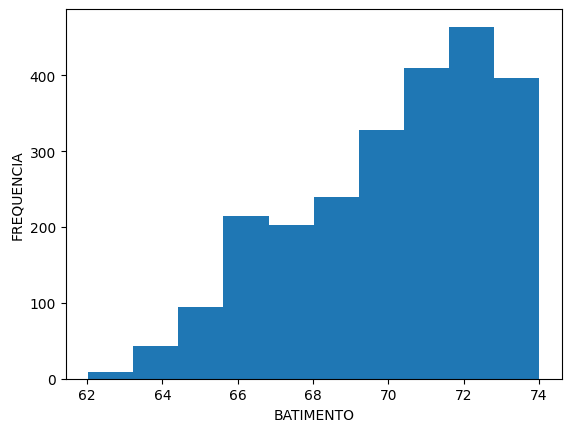

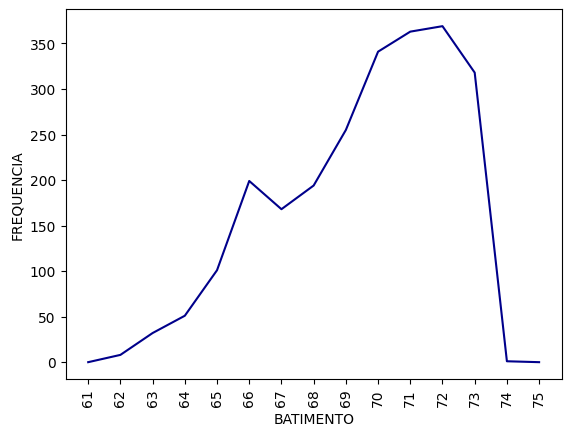

In [ ]:
#HISTOGRAMA BATIMENTO CARDIACO
plt.hist(batimento)
plt.xlabel("BATIMENTO")
plt.ylabel("FREQUENCIA")
plt.show()

plt.plot(histoBatimento[int(minBatimento)-1:int(maxBatimento)+2],color='darkblue')
xb=np.arange(int(minBatimento)-1,int(maxBatimento)+2)
xb1=np.arange(0,len(xb))
plt.xticks(xb1,xb,rotation='vertical')
plt.xlabel("BATIMENTO")
plt.ylabel("FREQUENCIA")
plt.show()


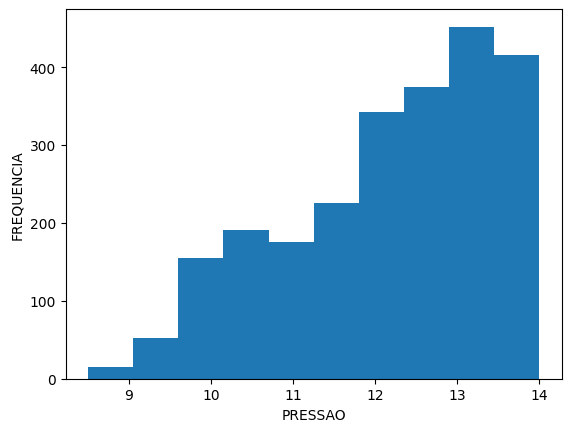

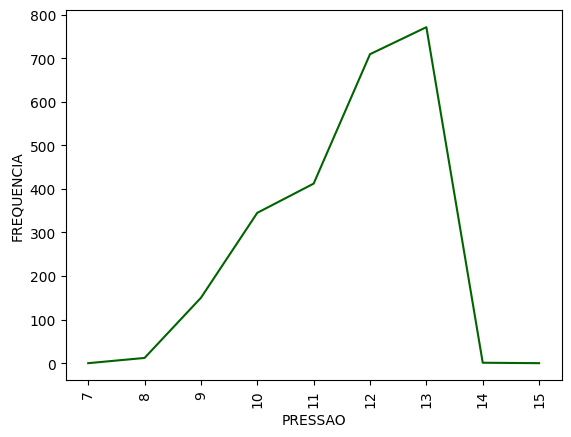

In [ ]:
#HISTOGRAMA PRESSAO ARTERIAL
plt.hist(pressao)
plt.xlabel("PRESSAO")
plt.ylabel("FREQUENCIA")
plt.show()

plt.plot(histoPressao[int(minPressao)-1:int(maxPressao)+2],color='darkgreen')
xp=np.arange(int(minPressao)-1,int(maxPressao)+2)
xp1=np.arange(0,len(xp))
plt.xticks(xp1,xp,rotation='vertical')
plt.xlabel("PRESSAO")
plt.ylabel("FREQUENCIA")
plt.show()

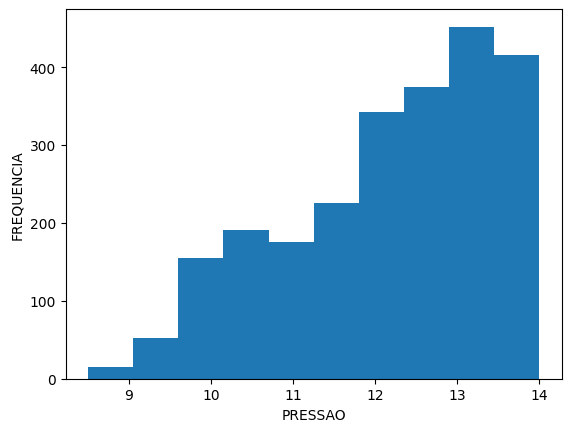

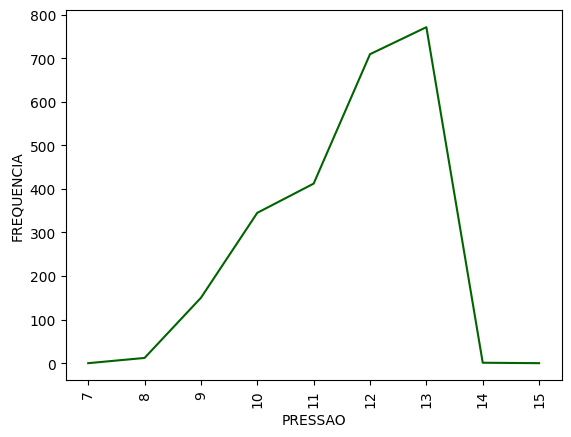

In [ ]:
#HISTOGRAMA PRESSAO ARTERIAL
plt.hist(pressao)
plt.xlabel("PRESSAO")
plt.ylabel("FREQUENCIA")
plt.show()

plt.plot(histoPressao[int(minPressao)-1:int(maxPressao)+2],color='darkgreen')
xp=np.arange(int(minPressao)-1,int(maxPressao)+2)
xp1=np.arange(0,len(xp))
plt.xticks(xp1,xp,rotation='vertical')
plt.xlabel("PRESSAO")
plt.ylabel("FREQUENCIA")
plt.show()

#**Ex 2**# 

In [ ]:
# Segmentando a lista em pacotes de 24 amostras cada
pacotes = [dados[i:i+24] for i in range(0, len(dados), 24)]
# Lista para armazenar as correlações de cada pacote
correlacoes = []

# Iterando sobre os pacotes de dados
for pacote in pacotes:
    # Criando um dataframe a partir do pacote de dados
    df = pd.DataFrame(pacote)
    # Calculando a correlação entre os valores de batimentos, pressão e temperatura
    correlacao = df[['BATIMENTO', 'PRESSAO', 'TEMPERATURA']].corr()
    # Adicionando a correlação à lista de correlações
    correlacoes.append(correlacao)
correlacoes

[             BATIMENTO   PRESSAO  TEMPERATURA
 BATIMENTO     1.000000  1.000000     0.063754
 PRESSAO       1.000000  1.000000     0.063754
 TEMPERATURA   0.063754  0.063754     1.000000,
              BATIMENTO   PRESSAO  TEMPERATURA
 BATIMENTO     1.000000  0.999973     0.326426
 PRESSAO       0.999973  1.000000     0.324269
 TEMPERATURA   0.326426  0.324269     1.000000,
              BATIMENTO   PRESSAO  TEMPERATURA
 BATIMENTO     1.000000  0.999869     0.286311
 PRESSAO       0.999869  1.000000     0.282143
 TEMPERATURA   0.286311  0.282143     1.000000,
              BATIMENTO   PRESSAO  TEMPERATURA
 BATIMENTO     1.000000  0.999709     0.450606
 PRESSAO       0.999709  1.000000     0.446522
 TEMPERATURA   0.450606  0.446522     1.000000,
              BATIMENTO   PRESSAO  TEMPERATURA
 BATIMENTO     1.000000  0.999515     0.639830
 PRESSAO       0.999515  1.000000     0.649004
 TEMPERATURA   0.639830  0.649004     1.000000,
              BATIMENTO   PRESSAO  TEMPERATURA
 BATIMEN

# Ex 3


In [ ]:
# Separando em 24 pacotes
pacotes = [dados[i:i+24] for i in range(0, len(dados), 24)]

# Aplicando correlação entre batimentos cardiacos e pressão arterial
novos_padroes = []
corr=[]
for pacote in pacotes:
    batimentos = [dado['BATIMENTO'] for dado in pacote]
    pressao = [dado['PRESSAO'] for dado in pacote]
    correlacao = np.corrcoef(batimentos, pressao)[0, 1]
    corr.append(correlacao)

for i in range(len(corr)):
  novos_padroes.append({f'CORRELACAO {i}':corr[i]}) 


novos_padroes
    #padroes_correlacao.append(padrao)

[{'CORRELACAO 0': 1.0},
 {'CORRELACAO 1': 0.9999732220991421},
 {'CORRELACAO 2': 0.999868767677834},
 {'CORRELACAO 3': 0.9997091944696964},
 {'CORRELACAO 4': 0.9995145995089647},
 {'CORRELACAO 5': 0.9994823047442246},
 {'CORRELACAO 6': 0.999285800164831},
 {'CORRELACAO 7': 0.998360904715695},
 {'CORRELACAO 8': 0.9986661479081073},
 {'CORRELACAO 9': 0.9981369908917835},
 {'CORRELACAO 10': 0.9971566879111331},
 {'CORRELACAO 11': 0.9958434738512508},
 {'CORRELACAO 12': 0.9954498527862148},
 {'CORRELACAO 13': 0.5225329762844274},
 {'CORRELACAO 14': 0.401430133187271},
 {'CORRELACAO 15': 0.9949169794268703},
 {'CORRELACAO 16': 0.9943842075347044},
 {'CORRELACAO 17': 0.9932865884534336},
 {'CORRELACAO 18': 0.9874524152492226},
 {'CORRELACAO 19': 0.9862015759626939},
 {'CORRELACAO 20': 0.9907326687190507},
 {'CORRELACAO 21': 0.9880755498273845},
 {'CORRELACAO 22': 0.9823513561007179},
 {'CORRELACAO 23': 0.9824157834299362},
 {'CORRELACAO 24': 0.9775006655055133},
 {'CORRELACAO 25': 0.98058815

# Ex 4#

MEDIA DOS BATIMENTOS = 69.39351708103908
MEDIANA DO BATIMENTOS = 69.92506387358193
MODA DOS BATIMENTOS =             0
0   62.027761
1   63.847083
2   65.208953
3   66.157837
4   66.501060
5   68.945073
6   69.260083
7   69.300843
8   69.364056
9   69.567108
10  69.859467
11  69.866157
12  69.983971
13  69.989991
14  70.246344
15  70.467321
16  70.514532
17  70.523174
18  71.338197
19  71.664875
20  71.968596
21  72.767590
22  72.893573
23  73.180765
DESVIO PADRAO DOS BATIMENTOS = 2.8031834229652803


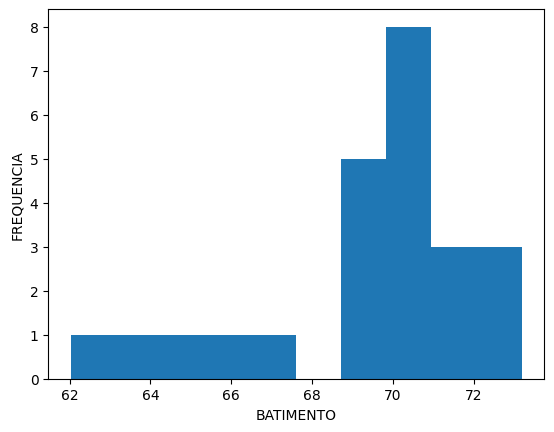

MEDIA DA PRESSAO = 11.651644467900871
MEDIANA DA PRESSAO = 11.777746184410404
MODA DA PRESSAO =             0
0    9.150211
1    9.201935
2    9.705750
3    9.748432
4   10.243663
5   10.823960
6   11.157456
7   11.173386
8   11.174549
9   11.471929
10  11.514721
11  11.675918
12  11.879574
13  12.135837
14  12.152263
15  12.237597
16  12.361220
17  12.532731
18  12.573256
19  13.088719
20  13.119244
21  13.329185
22  13.388349
23  13.799581
DESVIO PADRAO DA PRESSAO = 1.3312160449084205


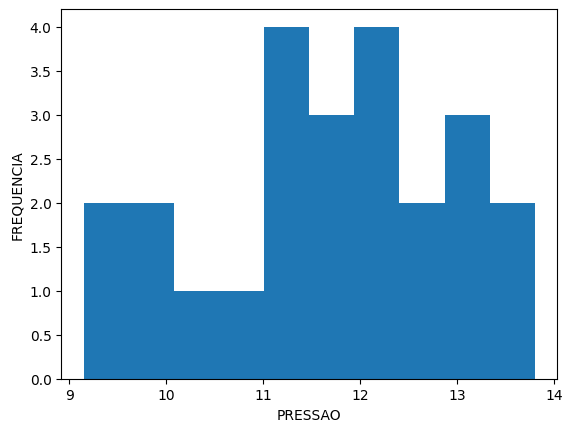

Temperaturas OK
MEDIA DA TEMPERATUA = 36.953924085352774
MEDIANA DA TEMPERATURA = 36.939401111404656
MODA DA TEMPERATURA =             0
0   36.459470
1   36.582263
2   36.685872
3   36.699839
4   36.709097
5   36.754298
6   36.773942
7   36.807835
8   36.850941
9   36.881577
10  36.924590
11  36.931346
12  36.947456
13  36.966627
14  36.989251
15  36.993834
16  37.073627
17  37.130939
18  37.134361
19  37.135846
20  37.252043
21  37.328315
22  37.384512
23  37.496297
DESVIO PADRAO DA TEMPERATURA = 0.2564593113227059


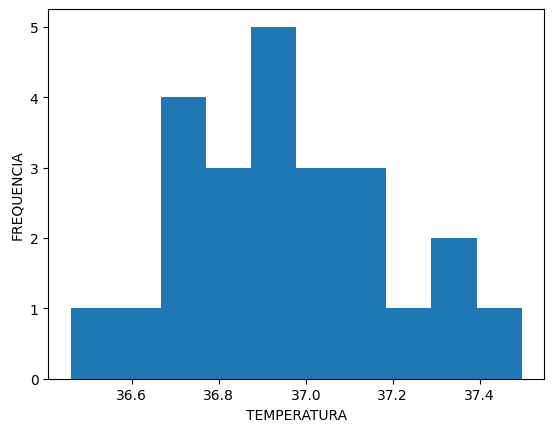

In [ ]:
from pandas.compat import numpy
# Separando em 24 pacotes
pacotes = [dados[i:i+24] for i in range(0, len(dados), 24)]

# Aplicando correlação entre batimentos cardiacos e pressão arterial
#novos_padroes = []
#corr=[]

for pacote in pacotes:
    batimentos = [dado['BATIMENTO'] for dado in pacote]
    pressao = [dado['PRESSAO'] for dado in pacote]
    temperatura = [dado['TEMPERATURA'] for dado in pacote]

    # correlacao = np.corrcoef(batimentos, pressao)[0, 1]
    # corr.append(correlacao)

# batimentos
df = pd.DataFrame(batimentos)
#df.astype(dtype='Float64')
media_batimentos = float(df.mean())
mediana_batimentos = float(df.median())
moda_batimentos = df.mode()
desv_padrao_batimentos = float(df.std())
print(f'MEDIA DOS BATIMENTOS = {media_batimentos}')
print(f'MEDIANA DO BATIMENTOS = {mediana_batimentos}')
print(f'MODA DOS BATIMENTOS = {moda_batimentos}')
print(f'DESVIO PADRAO DOS BATIMENTOS = {desv_padrao_batimentos}')
# histograma
plt.hist(df)
plt.xlabel("BATIMENTO")
plt.ylabel("FREQUENCIA")
plt.show()


# pressao
df = pd.DataFrame(pressao)
media_pressao = float(df.mean())
mediana_pressao = float(df.median())
moda_pressao = df.mode()
desv_padrao_pressao = float(df.std())
print(f'MEDIA DA PRESSAO = {media_pressao}')
print(f'MEDIANA DA PRESSAO = {mediana_pressao}')
print(f'MODA DA PRESSAO = {moda_pressao}')
print(f'DESVIO PADRAO DA PRESSAO = {desv_padrao_pressao}')
# histograma
plt.hist(df)
plt.xlabel("PRESSAO")
plt.ylabel("FREQUENCIA")
plt.show()


# temperatura
df = pd.DataFrame(temperatura)
media_temperatura = float(df.mean())
mediana_temperatura = float(df.median())
moda_temperatura = df.mode()
desv_padrao_temperatura = float(df.std())
# verifica se a media das temepraturas está dentro dos padrões que conhecemos
if media_temperatura > 36 and media_temperatura <38:
  print('Temperaturas OK')
  print(f'MEDIA DA TEMPERATUA = {media_temperatura}')
  print(f'MEDIANA DA TEMPERATURA = {mediana_temperatura}')
  print(f'MODA DA TEMPERATURA = {moda_temperatura}')
  print(f'DESVIO PADRAO DA TEMPERATURA = {desv_padrao_temperatura}')
  # histograma
  plt.hist(df)
  plt.xlabel("TEMPERATURA")
  plt.ylabel("FREQUENCIA")
  plt.show()

elif media_temperatura < 36 and media_temperatura>38:
  print('Dispare o alarme Temperatura fora dos padroes')
  

# histogramas
